In [2]:
# Write a program to perform histogram equalization. 
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
image = cv2.imread('../IMAGES/airoplane.bmp', 0)

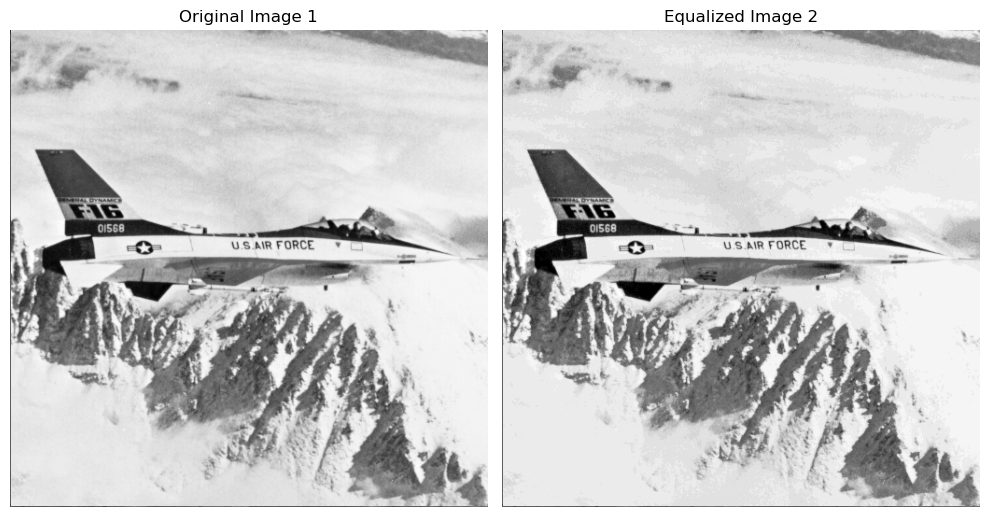

In [6]:
# 1. Write a program to perform histogram equalization. 
def histogram_equalization(image):
    histogram = np.zeros(256, dtype=np.uint8)  # Initialize histogram with zeros
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i, j]] += 1  # Increment count for each intensity value
    
  # Calculating cumulative distribution function (CDF)
    cdf = np.zeros(256, dtype=np.float32)  # Initialize CDF with zeros
    cdf[0] = histogram[0] / (image.size)  # Normalize for probability
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i] / (image.size)
    
  # Perform intensity mapping for equalization
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            new_intensity = int(cdf[pixel_value] * 255)  # Map intensity based on CDF
            equalized_image[i, j] = new_intensity

    return equalized_image

equalized_image = histogram_equalization(image)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# 2. Perform histogram matching by taking two images.
def histogram_matching(image1, image2):
    
  # Calculate histograms for both images
    hist1 = np.zeros(256, dtype=np.uint8)  # Initialize histograms with zeros
    hist2 = np.zeros(256, dtype=np.uint8)
    
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            pixel_value1 = image1[i, j]
            hist1[pixel_value1] += 1
            pixel_value2 = image2[i, j]
            hist2[pixel_value2] += 1

  # Calculate cumulative distribution functions (CDFs)
    cdf1 = np.zeros(256, dtype=np.float32)  # Initialize CDFs with zeros
    cdf2 = np.zeros(256, dtype=np.float32)
    cdf1[0] = hist1[0] / (image1.size)  # Normalize for probability
    cdf2[0] = hist2[0] / (image2.size)
    for i in range(1, 256):
        cdf1[i] = cdf1[i-1] + hist1[i] / (image1.size)
        cdf2[i] = cdf2[i-1] + hist2[i] / (image2.size)

  # Perform intensity mapping for matching
    matched_image = np.zeros_like(image1)
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            pixel_value = image1[i, j]
          # Find the closest intensity in image2 based on CDF
            new_intensity = np.argmin(np.abs(cdf2 - cdf1[pixel_value]))
            matched_image[i, j] = new_intensity

    return matched_image

# Example usage (assuming you have two loaded grayscale images 'image1' and 'image2')
image1 = cv2.imread('../IMAGES/girlface.bmp', 0)
image2 = cv2.imread('../IMAGES/CLina.jpg', 0)
matched_image = histogram_matching(image2, image1)

# Further processing or display the matched image here
cv2.imshow("image1", image1)
cv2.imshow("image2", image2)
cv2.imshow("Matched Image", matched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# 3. Write a program to perform smoothing on an image with averaging filters of size 3, 5, 9, 15 and 35. 
def apply_averaging_filter(image, filter_size):
    if filter_size % 2 == 0:
        raise ValueError("Filter size must be an odd integer.")

    pad_width = int(filter_size // 2)
    padded_image = np.pad(image, pad_width=pad_width, mode='edge')

  
    filtered_image = np.zeros_like(image)

  
    for i in range(pad_width, image.shape[0] + pad_width):
        for j in range(pad_width, image.shape[1] + pad_width):
            neighborhood = padded_image[i-pad_width:i+pad_width+1, j-pad_width:j+pad_width+1]

            filtered_image[i-pad_width, j-pad_width] = np.mean(neighborhood)
    
    return filtered_image

image = cv2.imread('../IMAGES/girlface.bmp', 0)

filtered_image = apply_averaging_filter(image.copy(), 15)

# You can process or display the filtered image here (e.g., print or plot)
cv2.imshow("Filtered Image Size 3", filtered_image)
cv2.waitKey(0)  # Wait for key press to close each window
cv2.destroyAllWindows()  # Close all open OpenCV windows


In [12]:
# 4.  Write a program to perform smoothing using a median filter of size 3 * 3.

def apply_median_filter(image):
  # Pad the image to handle boundaries
    pad_width = 1  # Half filter size (1 for 3x3)
    padded_image = np.pad(image, pad_width=pad_width, mode='edge')

  # Initialize the filtered image
    filtered_image = np.zeros_like(image)

  # Iterate through each pixel (excluding padded borders)
    for i in range(pad_width, image.shape[0] + pad_width):
        for j in range(pad_width, image.shape[1] + pad_width):
      # Extract neighborhood for median filtering
            neighborhood = padded_image[i-pad_width:i+pad_width+1, j-pad_width:j+pad_width+1].flatten()

      # Sort the neighborhood and get the median value
            sorted_neighborhood = np.sort(neighborhood)
            median_value = sorted_neighborhood[int(len(neighborhood) / 2)]

      # Assign the median value to the corresponding pixel in the filtered image
            filtered_image[i-pad_width, j-pad_width] = median_value

    return filtered_image


# Apply median filter
filtered_image = apply_median_filter(image.copy())

# Display or further process the filtered image (e.g., print or plot)
cv2.imshow("Median Filtered Image", filtered_image)
cv2.waitKey(0)  # Wait for key press to close window
cv2.destroyAllWindows()


In [14]:
# 5. Write a program for sharpening an image using Gradient operator.

def gradient_operator(image, kernel_size=3):
    # Define Sobel kernels for horizontal and vertical gradients
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    # Apply Sobel kernels to calculate horizontal and vertical gradients
    gradient_x = cv2.filter2D(image, -1, sobel_x)
    gradient_y = cv2.filter2D(image, -1, sobel_y)
    
    # Combine horizontal and vertical gradients to get gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    
    # Normalize gradient magnitude to 0-255
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
    
    return gradient_magnitude.astype(np.uint8)

def sharpen_image(image, kernel_size=3, alpha=1.0):
    # Apply gradient operator to get the gradient magnitude
    gradient_magnitude = gradient_operator(image, kernel_size)
    
    # Add the gradient magnitude to the original image with a scaling factor alpha
    sharpened_image = np.clip(image + alpha * gradient_magnitude, 0, 255)
    
    return sharpened_image.astype(np.uint8)

# Read the image
img_2 = cv2.imread('../IMAGES/girlface.bmp', 0)

# Apply sharpening using the gradient operator
sharpened_image = sharpen_image(img_2, kernel_size=3, alpha=1.0)

# Display the results
cv2.imshow('Original Image', img_2)
cv2.imshow('Sharpened Image', sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [16]:
# 6.Write a program to perform following operations for sharpening an image:
# Take an image 

def laplacian_filter(image):
    laplacian_kernel = np.array([[0, -1, 0],
                               [-1, 4, -1],
                               [0, -1, 0]])

    padded_image = np.pad(image, 1, mode='edge')  
    
 
    filtered_image = np.zeros_like(image) 
    
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
      
            neighborhood = padded_image[i-1:i+2, j-1:j+2] 
      
            filtered_image[i-1, j-1] = abs(np.sum(neighborhood * laplacian_kernel))

    return filtered_image

# Apply Laplacian
filtered_image = laplacian_filter(image)

# Obtain sharpen image by adding ‘a’ and ‘b’
sharpened_image = filtered_image + image

In [18]:
# 7.  Write a program for sharpening an image using unsharp masking and highboost filtering. 
def unsharp_masking(image, sigma=1.0, strength=1.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    mask = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return np.clip(mask, 0, 255).astype(np.uint8)

def highboost_filter(image, sigma=1.0, strength=1.0):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    mask = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return np.clip(mask, 0, 255).astype(np.uint8)

# Read the image
img = cv2.imread('../IMAGES/girlface.bmp', 0)
# Apply unsharp masking
unsharp_masked_image = unsharp_masking(img, sigma=2.0, strength=1.5)

# Apply highboost filtering
highboost_filtered_image = highboost_filter(img, sigma=2.0, strength=1.5)

# Display the results
cv2.imshow('Original Image', img)
cv2.imshow('Unsharp Masked Image', unsharp_masked_image)
cv2.imshow('Highboost Filtered Image', highboost_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()